# USA and Canada wildfire data cleaning
* https://firms.modaps.eosdis.nasa.gov/map/#d:24hrs;@-0.8,0.5,3z (live wildfire)
* https://firms.modaps.eosdis.nasa.gov/country/ (Dataset download page)
* https://firms.modaps.eosdis.nasa.gov/country/ (Dataset for modis data have to download wildfire for all countries)
* https://firms.modaps.eosdis.nasa.gov/country/ (Dataset for viirs data have to download wildfire for all countries) 
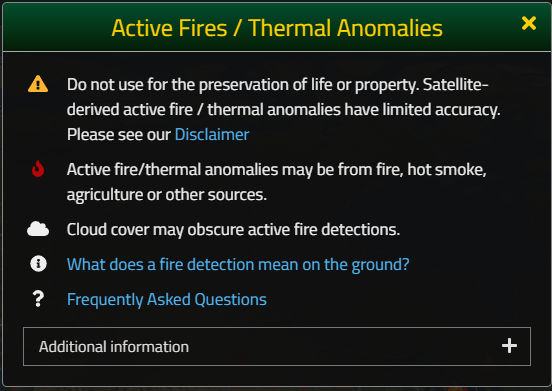


In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import plotly.express as px
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
#grab all csv data in usa and canada wildfire data 
all_csv_files = glob.glob('../usa_canada_wildfire_data/**/*.csv', recursive=True)

In [4]:
all_csv_files

['../usa_canada_wildfire_data\\modis\\2000\\modis_2000_Canada.csv',
 '../usa_canada_wildfire_data\\modis\\2000\\modis_2000_United_States.csv',
 '../usa_canada_wildfire_data\\modis\\2001\\modis_2001_Canada.csv',
 '../usa_canada_wildfire_data\\modis\\2001\\modis_2001_United_States.csv',
 '../usa_canada_wildfire_data\\modis\\2002\\modis_2002_Canada.csv',
 '../usa_canada_wildfire_data\\modis\\2002\\modis_2002_United_States.csv',
 '../usa_canada_wildfire_data\\modis\\2003\\modis_2003_Canada.csv',
 '../usa_canada_wildfire_data\\modis\\2003\\modis_2003_United_States.csv',
 '../usa_canada_wildfire_data\\modis\\2004\\modis_2004_Canada.csv',
 '../usa_canada_wildfire_data\\modis\\2004\\modis_2004_United_States.csv',
 '../usa_canada_wildfire_data\\modis\\2005\\modis_2005_Canada.csv',
 '../usa_canada_wildfire_data\\modis\\2005\\modis_2005_United_States.csv',
 '../usa_canada_wildfire_data\\modis\\2006\\modis_2006_Canada.csv',
 '../usa_canada_wildfire_data\\modis\\2006\\modis_2006_United_States.csv',

In [5]:
len(all_csv_files)

62

In [6]:
type(all_csv_files)

list

# Data Visulization

In [7]:
df_viirs_us = pd.read_csv('../usa_canada_wildfire_data/viirs-snpp/2020/viirs-snpp_2020_United_States.csv',low_memory=False)
df_viirs_canada = pd.read_csv('../usa_canada_wildfire_data/viirs-snpp/2020/viirs-snpp_2020_Canada.csv',low_memory=False)

In [8]:
df_viirs_us

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,46.730213,-92.075386,303.31,0.56,0.52,2020-01-01,727,N,VIIRS,n,1,264.04,1.43,N,3
1,46.729069,-92.077477,301.76,0.56,0.52,2020-01-01,727,N,VIIRS,n,1,263.05,1.27,N,2
2,40.721516,-84.126244,323.46,0.39,0.36,2020-01-01,728,N,VIIRS,n,1,268.47,1.80,N,2
3,41.639717,-87.130882,300.05,0.45,0.39,2020-01-01,728,N,VIIRS,n,1,268.17,1.23,N,3
4,41.619049,-87.328514,297.25,0.46,0.39,2020-01-01,728,N,VIIRS,n,1,268.34,0.82,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672445,19.409372,-155.295761,332.17,0.49,0.49,2020-12-31,2306,N,VIIRS,n,1,290.31,3.08,1,0
672446,19.402180,-155.285187,367.00,0.49,0.49,2020-12-31,2306,N,VIIRS,l,1,286.75,26.13,1,0
672447,19.404821,-155.271347,350.90,0.49,0.49,2020-12-31,2306,N,VIIRS,n,1,288.63,67.31,1,0
672448,19.399593,-155.298752,326.91,0.49,0.49,2020-12-31,2306,N,VIIRS,n,1,285.83,4.16,1,0


In [9]:
df_viirs_canada

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,50.736931,-98.213272,326.23,0.56,0.69,2020-01-01,726,N,VIIRS,n,1,263.47,2.95,N,0
1,58.778122,-117.410995,346.71,0.34,0.56,2020-01-01,905,N,VIIRS,n,1,261.67,4.47,N,0
2,58.772854,-117.411377,328.44,0.34,0.56,2020-01-01,905,N,VIIRS,n,1,260.48,4.47,N,0
3,58.778267,-117.416992,332.17,0.35,0.56,2020-01-01,905,N,VIIRS,n,1,260.32,4.47,N,0
4,54.812515,-113.736038,298.32,0.47,0.48,2020-01-01,906,N,VIIRS,n,1,261.33,1.52,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49243,54.100742,-118.559227,269.85,0.38,0.59,2020-12-31,2130,N,VIIRS,l,1,269.86,1.17,1,0
49244,54.197147,-118.885750,367.00,0.37,0.58,2020-12-31,2130,N,VIIRS,l,1,271.81,21.77,1,0
49245,54.202393,-118.894112,350.49,0.37,0.58,2020-12-31,2130,N,VIIRS,n,1,267.36,6.12,1,0
49246,54.196983,-118.892639,356.20,0.37,0.58,2020-12-31,2130,N,VIIRS,n,1,270.32,10.65,1,0


In [10]:
df_viirs_us['satellite'].unique()

array(['N'], dtype=object)

In [11]:
df_viirs_us['instrument'].unique()

array(['VIIRS'], dtype=object)

In [12]:
type(df_viirs_us.confidence[0])

str

In [13]:
isinstance(df_viirs_us.confidence[0], str)

True

***Found that the viirs dataset confidence scores weren't numeric***

In [14]:
df_viirs_us.confidence.unique()

array(['n', 'h', 'l'], dtype=object)

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:>

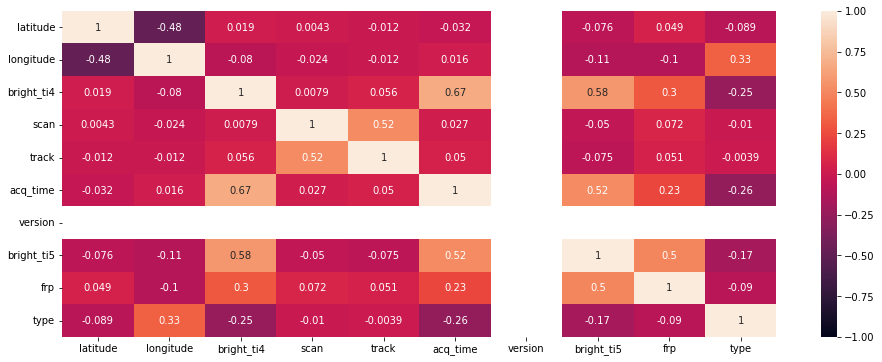

In [15]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_viirs_us.corr(), vmin=-1, vmax=1, annot=True)

<Figure size 1152x1152 with 0 Axes>

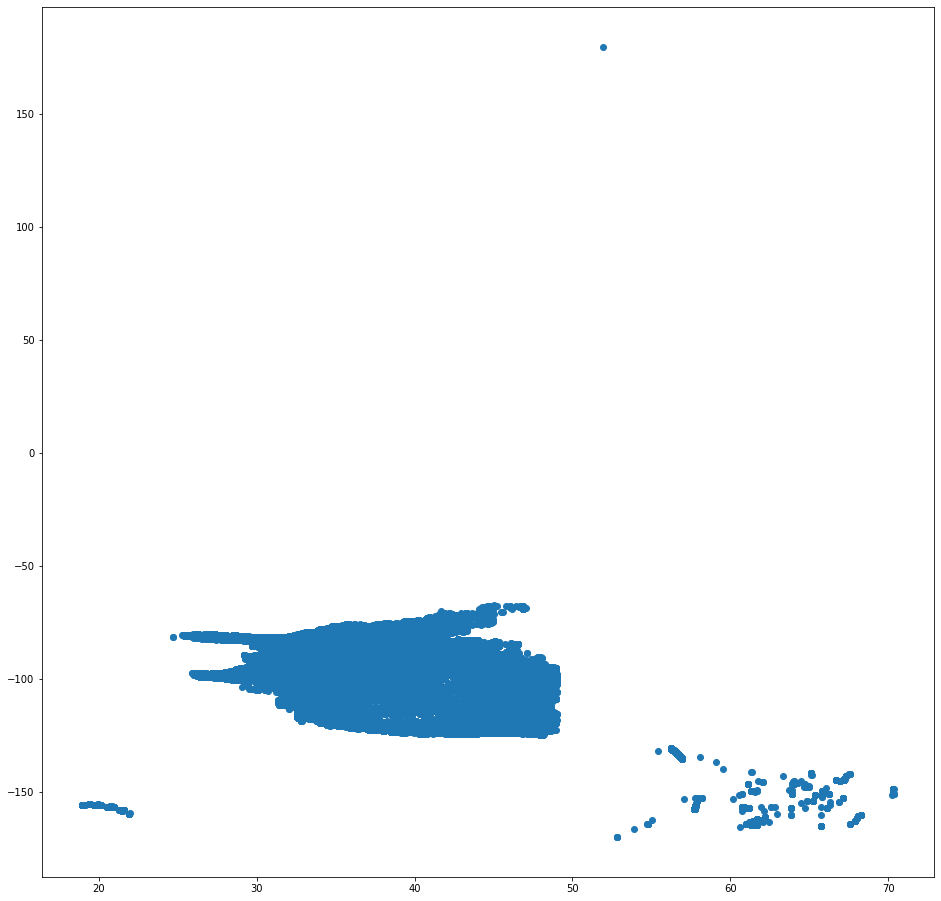

In [16]:
plt.figure(figsize=(16, 16))
plt.scatter(x = df_viirs_us['longitude'], y = df_viirs_us['latitude'])

In [17]:
df_modis_us = pd.read_csv('../usa_canada_wildfire_data/modis/2020/modis_2020_United_States.csv')
df_modis_canada = pd.read_csv('../usa_canada_wildfire_data/modis/2020/modis_2020_Canada.csv')

In [18]:
df_modis_us

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,31.8349,-83.0561,306.7,1.4,1.2,2020-01-01,324,Terra,MODIS,69,6.03,277.6,18.9,N,0
1,36.3562,-76.8050,300.2,1.2,1.1,2020-01-01,325,Terra,MODIS,20,6.03,278.9,10.2,N,0
2,33.4178,-110.8616,321.5,1.0,1.0,2020-01-01,920,Aqua,MODIS,100,6.03,271.8,24.9,N,2
3,41.4810,-90.8294,310.0,1.0,1.0,2020-01-01,1704,Terra,MODIS,69,6.03,276.5,13.8,D,0
4,38.6973,-90.1281,311.7,1.1,1.0,2020-01-01,1705,Terra,MODIS,54,6.03,282.3,14.1,D,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153843,38.7099,-122.8631,316.1,1.1,1.1,2020-12-31,2131,Aqua,MODIS,76,6.03,285.8,18.6,D,0
153844,39.7121,-122.2936,300.4,1.2,1.1,2020-12-31,2131,Aqua,MODIS,35,6.03,286.2,5.6,D,0
153845,37.7988,-121.1489,301.3,1.3,1.1,2020-12-31,2131,Aqua,MODIS,46,6.03,281.4,8.6,D,0
153846,39.1593,-122.9303,308.7,1.1,1.1,2020-12-31,2131,Aqua,MODIS,67,6.03,283.3,13.1,D,0


In [19]:
df_modis_canada

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,56.3398,-114.5390,324.3,1.2,1.1,2020-01-01,1839,Terra,MODIS,0,6.03,268.8,36.0,D,0
1,55.2304,-115.7741,306.0,1.1,1.0,2020-01-04,1910,Terra,MODIS,62,6.03,271.2,13.3,D,0
2,55.6960,-115.8490,326.5,1.0,1.0,2020-01-04,1910,Terra,MODIS,84,6.03,269.2,32.0,D,0
3,55.6986,-115.8650,301.2,1.0,1.0,2020-01-04,1910,Terra,MODIS,45,6.03,268.4,10.2,D,0
4,49.4193,-115.5279,308.2,1.2,1.1,2020-01-04,2057,Aqua,MODIS,67,6.03,270.4,19.3,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12214,56.3122,-122.1917,355.0,1.1,1.0,2020-12-28,2105,Aqua,MODIS,94,6.03,271.1,83.6,D,0
12215,54.0545,-108.1625,377.5,1.0,1.0,2020-12-29,1821,Terra,MODIS,100,6.03,268.9,0.0,D,0
12216,54.5382,-115.1218,364.5,1.2,1.1,2020-12-29,2009,Aqua,MODIS,94,6.03,267.7,0.0,D,0
12217,55.6564,-119.5774,354.7,1.0,1.0,2020-12-30,2052,Aqua,MODIS,0,6.03,268.7,83.3,D,0


In [20]:
df_modis_us['satellite'].unique()

array(['Terra', 'Aqua'], dtype=object)

In [21]:
df_modis_us['instrument'].unique()

array(['MODIS'], dtype=object)

In [22]:
type(df_modis_us['confidence'][0])

numpy.int64

In [23]:
df_modis_us['confidence'].unique()

array([ 69,  20, 100,  54,  38,  60,   0,  70,  78,  46,  57,  83,  82,
        74,  79,  86,  53,  72,  41,  35,  73,  66,  84,  59,  55,  31,
        45,  50,  51,  47,  71,  63,  24,  36,  48,  80,  62,  49,  65,
        75,  67,  52,  58,  56,  93,  94,  64,  68,  61,  85,  90,  81,
        40,  88,  42,  97,  96,  33,  91,  87,  77,  76,  39,  44,  95,
        37,  89,  98,  30,  99,  21,  92,  29,  16,  17,  26,  32,  34,
        43,  25,  22,  19,  28,   9,  27,  23,  15,  13,  14,  18,  11,
        10,   8,  12,   6,   4,   7,   3,   5,   2,   1], dtype=int64)

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:>

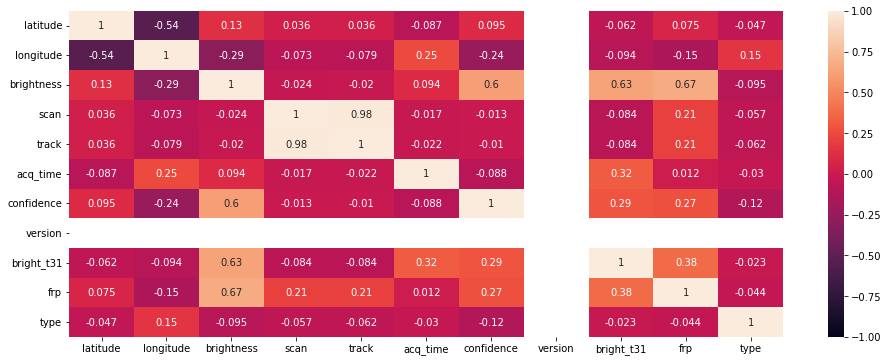

In [24]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_modis_us.corr(), vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

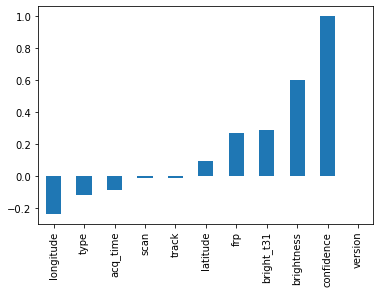

In [25]:
df_modis_us.corr()['confidence'].sort_values().plot(kind='bar')

<Figure size 1152x1152 with 0 Axes>

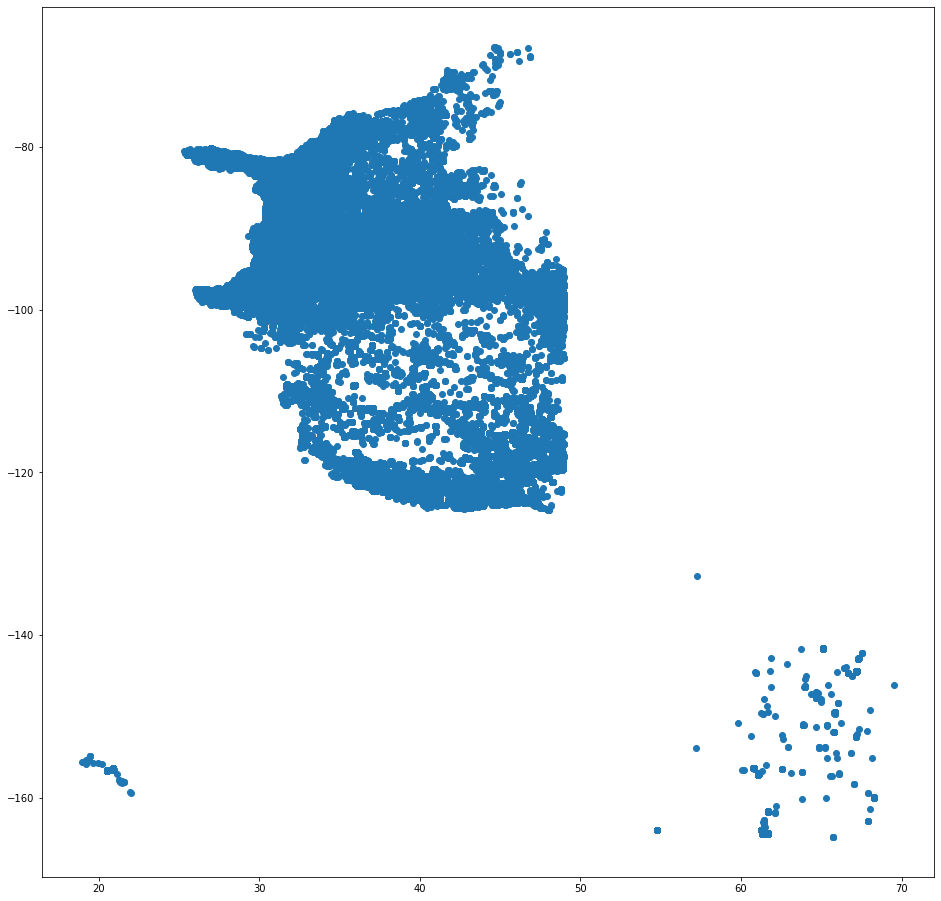

In [26]:
plt.figure(figsize=(16, 16))
plt.scatter(x = df_modis_us['longitude'], y = df_modis_us['latitude'])

# Data Cleaning
***Putting all data in one dataset and fixing the confidence score on the viirs data***

In [27]:
rows = []
fire_df = []
row_sum = 0
for f in tqdm(all_csv_files):
    df = pd.read_csv(f, parse_dates=['acq_time'], low_memory=False) 
    csv_name = f.split('/')[-1]
    row = [
        f, csv_name, df.shape[0], df.shape[1], df.acq_date.min(), df.acq_date.max(),
        df.satellite.unique(), df.instrument.max(), df.version.max(),
        df.latitude.nunique(), df.longitude.nunique(),
        df.confidence.nunique(), df.satellite.nunique(), df.acq_date.nunique()
    ]
    if isinstance(df.confidence[0], str):
        df.confidence = df.confidence.replace({'l': 0, 'n': 50, 'h': 100})
    rows.append(row)
    row_sum = row_sum + df.shape[0]
    fire_df.append(df)
cols = [
    'path', 'csv', 'rows', 'cols', 'start', 'end',
    'satellite', 'instrument', 'version',
    'lats', 'lons', 'confs', 'sats', 'days'
]
filestats = pd.DataFrame(rows, columns=cols)
filestats.sort_values(by=['start', 'instrument'])
print("Total Rows: " + str(row_sum))

100%|██████████| 62/62 [00:24<00:00,  2.51it/s]


,path,csv,rows,cols,start,end,satellite,instrument,version,lats,lons,confs,sats,days
0,../usa_canada_wildfire_data\modis\2000\modis_2...,usa_canada_wildfire_data\modis\2000\modis_2000...,846,15,2000-11-01,2000-12-30,[Terra],MODIS,6.20,835,844,86,1,40
1,../usa_canada_wildfire_data\modis\2000\modis_2...,usa_canada_wildfire_data\modis\2000\modis_2000...,3781,15,2000-11-01,2000-12-31,[Terra],MODIS,6.20,3720,3712,96,1,61
2,../usa_canada_wildfire_data\modis\2001\modis_2...,usa_canada_wildfire_data\modis\2001\modis_2001...,7780,15,2001-01-01,2001-12-30,[Terra],MODIS,6.20,7426,7630,100,1,303
3,../usa_canada_wildfire_data\modis\2001\modis_2...,usa_canada_wildfire_data\modis\2001\modis_2001...,44941,15,2001-01-01,2001-12-31,[Terra],MODIS,6.20,37881,40596,101,1,347
5,../usa_canada_wildfire_data\modis\2002\modis_2...,usa_canada_wildfire_data\modis\2002\modis_2002...,79715,15,2002-01-01,2002-12-31,"[Terra, Aqua]",MODIS,6.20,61851,68094,101,2,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,../usa_canada_wildfire_data\modis\2020\modis_2...,usa_canada_wildfire_data\modis\2020\modis_2020...,153848,15,2020-01-01,2020-12-31,"[Terra, Aqua]",MODIS,6.03,93718,109931,101,2,366
58,../usa_canada_wildfire_data\viirs-snpp\2020\vi...,usa_canada_wildfire_data\viirs-snpp\2020\viirs...,49248,15,2020-01-01,2020-12-31,[N],VIIRS,1.00,47797,47493,3,1,365
59,../usa_canada_wildfire_data\viirs-snpp\2020\vi...,usa_canada_wildfire_data\viirs-snpp\2020\viirs...,672450,15,2020-01-01,2020-12-31,[N],VIIRS,1.00,586894,521973,3,1,366
60,../usa_canada_wildfire_data\viirs-snpp\2021\vi...,usa_canada_wildfire_data\viirs-snpp\2021\viirs...,450281,15,2021-01-01,2021-12-31,[N],VIIRS,1.00,398194,385535,3,1,361


Total Rows: 11515066


In [28]:
fire_df

[     latitude  longitude  brightness  scan  track    acq_date acq_time  \
 0     49.2088  -118.7312       304.0   1.1    1.0  2000-11-01     0611   
 1     49.2070  -118.7463       306.3   1.1    1.0  2000-11-01     0611   
 2     49.4044  -118.9513       303.7   1.1    1.0  2000-11-01     0611   
 3     49.6365  -119.3867       309.0   1.1    1.0  2000-11-01     0611   
 4     49.4978  -120.6016       301.9   1.0    1.0  2000-11-01     0611   
 ..        ...        ...         ...   ...    ...         ...      ...   
 841   54.7208  -119.4649       301.6   1.0    1.0  2000-12-30     1923   
 842   54.7187  -119.4496       313.4   1.0    1.0  2000-12-30     1923   
 843   53.4395  -115.8912       323.4   1.1    1.1  2000-12-30     1923   
 844   53.4036  -115.8562       303.4   1.1    1.1  2000-12-30     1923   
 845   53.3945  -115.8607       343.2   1.1    1.1  2000-12-30     1923   
 
     satellite instrument  confidence  version  bright_t31   frp daynight  type  
 0       Terra  

In [29]:
us_canada_fire_df = pd.concat(fire_df)
us_canada_fire_df.shape

(11515066, 17)

In [30]:
us_canada_fire_df.sample(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,bright_ti4,bright_ti5
128145,58.804276,-111.949707,NaN,0.47,0.39,2015-06-29,2024,N,VIIRS,50,1.00,NaN,5.47,D,0,339.09,302.10
112775,41.729370,-101.863396,NaN,0.34,0.56,2016-04-06,2028,N,VIIRS,100,1.00,NaN,47.82,D,0,367.00,295.78
171146,29.000662,-95.401306,NaN,0.48,0.48,2020-07-13,0830,N,VIIRS,50,1.00,NaN,2.32,0,0,309.81,294.70
105355,60.190197,-124.968323,NaN,0.52,0.67,2013-07-03,2213,N,VIIRS,50,1.00,NaN,19.01,D,0,352.24,292.85
260692,41.305569,-120.972214,NaN,0.39,0.44,2017-07-31,1026,N,VIIRS,50,1.00,NaN,2.86,N,0,327.68,293.30
333140,41.332191,-123.195892,NaN,0.53,0.50,2021-08-06,2142,N,VIIRS,50,1.00,NaN,3.62,D,0,330.49,298.41
75263,28.270400,-96.911600,329.1,2.30,1.50,2019-08-20,1745,Terra,MODIS,46,6.03,293.0,61.40,D,0,NaN,NaN
52068,33.409500,-108.497800,308.8,1.20,1.10,2006-06-22,0534,Terra,MODIS,64,6.20,289.0,11.30,N,0,NaN,NaN
14209,36.442200,-97.473600,312.3,1.00,1.00,2017-02-23,1718,Terra,MODIS,68,6.20,284.4,11.80,D,0,NaN,NaN
283956,41.520069,-108.782166,NaN,0.42,0.38,2018-07-28,2021,N,VIIRS,0,1.00,NaN,13.57,D,0,367.00,285.41


In [31]:
us_canada_fire_df = us_canada_fire_df.sort_values(by=['acq_date','acq_time'])

In [32]:
us_canada_fire_df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,bright_ti4,bright_ti5
0,38.542200,-78.304700,304.8,2.80,1.60,2000-11-01,0250,Terra,MODIS,23,6.2,280.9,40.30,N,0,NaN,NaN
1,38.556300,-78.308400,309.4,2.80,1.60,2000-11-01,0250,Terra,MODIS,70,6.2,280.4,54.50,N,0,NaN,NaN
2,38.545100,-78.310700,309.9,2.80,1.60,2000-11-01,0250,Terra,MODIS,79,6.2,280.7,58.80,N,0,NaN,NaN
3,38.558600,-78.317000,302.3,2.80,1.60,2000-11-01,0250,Terra,MODIS,45,6.2,279.8,36.00,N,0,NaN,NaN
4,31.339300,-89.912400,304.9,1.00,1.00,2000-11-01,0427,Terra,MODIS,62,6.2,287.5,8.50,N,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450279,42.808022,-80.093155,NaN,0.41,0.61,2021-12-31,1906,N,VIIRS,50,1.0,NaN,5.70,D,2,333.36,281.90
450280,42.801987,-80.103012,NaN,0.41,0.60,2021-12-31,1906,N,VIIRS,50,1.0,NaN,7.68,D,2,328.54,280.91
661055,40.144726,-101.530975,NaN,0.51,0.50,2021-12-31,1906,N,VIIRS,50,1.0,NaN,7.29,D,0,342.62,277.59
661056,38.554855,-122.550667,NaN,0.52,0.41,2021-12-31,2042,N,VIIRS,50,1.0,NaN,8.67,D,0,334.54,281.30


In [33]:
us_canada_fire_df['confidence'].unique()

array([ 23,  70,  79,  45,  62,  75,  74,  54,  69,  77,  72,  49,  36,
        43,  52,  21,  63,  58,  67,  57,  76, 100,  60,  53,  44,  83,
        33,  99,  97,  93,  47,  64,  51,  40,   0,  68,  56,  96,  98,
        95,  42,  73,  91,  92,  41,  26,  88,  81,  61,  59,  71,  46,
        82,  50,  65,  55,  22,  90,  87,  86,  66,  34,  84,  78,  80,
        89,  29,  85,  37,  24,  94,  48,  31,  18,  32,  39,  19,  10,
        30,   4,  13,   2,  28,  20,  38,  27,  35,  17,   7,  25,  16,
        14,   9,   8,  15,  12,  11,   6,   5,   3,   1], dtype=int64)

In [34]:
us_canada_fire_df['confidence'].nunique()

101

In [35]:
#Brightness = Channel 21/22 brightness temperature of the fire pixel measured in Kelvin.
us_canada_fire_df['brightness'].describe()

count    3.363515e+06
mean     3.275784e+02
std      2.571350e+01
min      3.000000e+02
25%      3.109000e+02
50%      3.205000e+02
75%      3.358000e+02
max      5.074000e+02
Name: brightness, dtype: float64

In [36]:
#bright_t31 = Channel 31 brightness temperature of the fire pixel measured in Kelvin.
us_canada_fire_df['bright_t31'].describe()

count    3.363515e+06
mean     2.945087e+02
std      1.015091e+01
min      2.635000e+02
25%      2.888000e+02
50%      2.946000e+02
75%      3.000000e+02
max      4.001000e+02
Name: bright_t31, dtype: float64

In [37]:
us_canada_fire_df['bright_t31'].unique()

array([280.9, 280.4, 280.7, ..., 373.7, 381.8, 360.9])

In [38]:
us_canada_fire_df['satellite'].unique()

array(['Terra', 'Aqua', 'N'], dtype=object)

In [39]:
us_canada_fire_df['instrument'].unique()

array(['MODIS', 'VIIRS'], dtype=object)

In [40]:
#frp = Fire Radiative Power depicts the pixel-integrated fire radiative power in MW (megawatts).
us_canada_fire_df['frp'].describe()

count    1.151507e+07
mean     3.281251e+01
std      1.308226e+02
min     -5.920000e+01
25%      2.550000e+00
50%      7.420000e+00
75%      2.261000e+01
max      1.614640e+04
Name: frp, dtype: float64

In [41]:
'''
Type
0 = presumed vegetation fire
1 = active volcano
2 = other static land source
3 = offshore
'''
us_canada_fire_df['type'].unique()

'\nType\n0 = presumed vegetation fire\n1 = active volcano\n2 = other static land source\n3 = offshore\n'

array([0, 2, 3, 1], dtype=int64)

In [42]:
'''
Confidence = This value is based on a collection of intermediate algorithm quantities used in the detection process
It is intended to help users gauge the quality of individual hotspot/fire pixels
Confidence estimates range between 0 and 100% and are assigned one of the three fire classes

1. low-confidence fire
2. nominal-confidence fire
3. high-confidence fire
'''

us_canada_fire_df['confidence'].unique()

'\nConfidence = This value is based on a collection of intermediate algorithm quantities used in the detection process\nIt is intended to help users gauge the quality of individual hotspot/fire pixels\nConfidence estimates range between 0 and 100% and are assigned one of the three fire classes\n\n1. low-confidence fire\n2. nominal-confidence fire\n3. high-confidence fire\n'

array([ 23,  70,  79,  45,  62,  75,  74,  54,  69,  77,  72,  49,  36,
        43,  52,  21,  63,  58,  67,  57,  76, 100,  60,  53,  44,  83,
        33,  99,  97,  93,  47,  64,  51,  40,   0,  68,  56,  96,  98,
        95,  42,  73,  91,  92,  41,  26,  88,  81,  61,  59,  71,  46,
        82,  50,  65,  55,  22,  90,  87,  86,  66,  34,  84,  78,  80,
        89,  29,  85,  37,  24,  94,  48,  31,  18,  32,  39,  19,  10,
        30,   4,  13,   2,  28,  20,  38,  27,  35,  17,   7,  25,  16,
        14,   9,   8,  15,  12,  11,   6,   5,   3,   1], dtype=int64)

In [43]:
us_canada_fire_df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type', 'bright_ti4', 'bright_ti5'],
      dtype='object')

<Figure size 1152x1152 with 0 Axes>

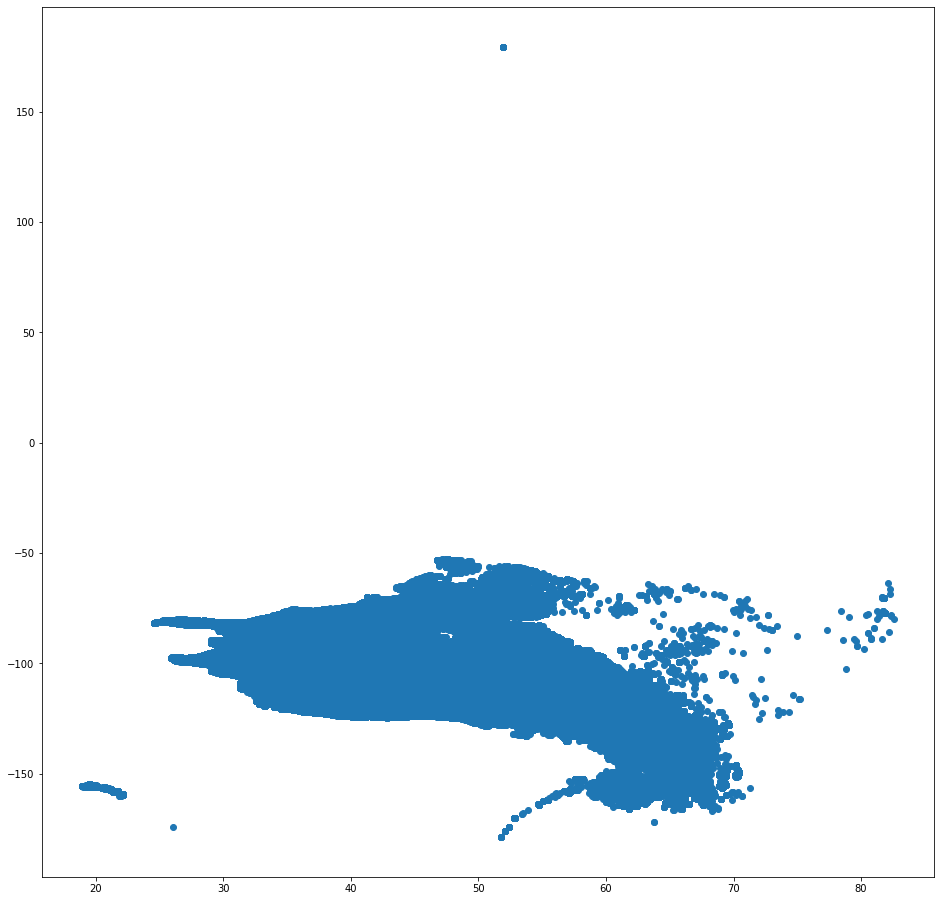

In [61]:
plt.figure(figsize=(16, 16))
plt.scatter(x = us_canada_fire_df['latitude'], y = us_canada_fire_df['longitude'])

### Getting our data into a more correct form 

In [45]:
daily_fires_df = us_canada_fire_df.groupby(
            ['latitude', 'longitude', 'acq_date', 'satellite', 'instrument', 'frp', 'type', 'bright_t31']).confidence.max().reset_index()

In [46]:
daily_fires_df

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
0,18.9325,-155.6619,2005-05-24,Aqua,MODIS,12.6,0,296.6,0
1,18.9464,-155.6658,2003-07-18,Aqua,MODIS,426.6,0,313.7,94
2,18.9478,-155.6555,2003-07-18,Aqua,MODIS,1330.3,0,333.7,87
3,18.9492,-155.6451,2003-07-18,Aqua,MODIS,111.8,0,310.0,0
4,18.9557,-155.6673,2003-07-18,Aqua,MODIS,260.6,0,311.4,100
...,...,...,...,...,...,...,...,...,...
3363510,81.8981,-77.3498,2015-07-15,Terra,MODIS,10.1,0,292.0,44
3363511,81.8984,-77.3632,2020-07-21,Terra,MODIS,8.1,0,290.0,27
3363512,81.8993,-77.3684,2015-07-09,Terra,MODIS,7.7,0,290.0,15
3363513,82.3210,-78.2312,2020-06-29,Terra,MODIS,12.4,0,290.8,17


In [47]:
daily_fires_df['confidence'].unique()

array([  0,  94,  87, 100,  75,  86,  46,  34,  85,  42,  40,  69,  23,
        74,  60,  55,  56,  53,  70,  47,  82,  27,  25,  66,  72,  19,
        65,  59,  57,  89,  91,  48,  30,  20,  22,  37,  67,  24,  71,
        54,  61,  92,  77,  36,  33,  81,  35,  63,  41,  51,  90,  45,
        98,  32,  21,  58,  78,  68,  38,  95,  73,  50,  29,  44,  99,
        97,  96,  49,  43,  28,  80,  84,  83,  17,   7,  64,  62,  79,
         6,  14,  18,  76,  16,  88,  39,  93,  15,  52,  12,   8,  31,
        13,  11,  26,   5,   9,   2,  10,   4,   3,   1], dtype=int64)

In [48]:
daily_fires_df = daily_fires_df[daily_fires_df.confidence >= 50]

In [49]:
daily_fires_df

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
1,18.9464,-155.6658,2003-07-18,Aqua,MODIS,426.6,0,313.7,94
2,18.9478,-155.6555,2003-07-18,Aqua,MODIS,1330.3,0,333.7,87
4,18.9557,-155.6673,2003-07-18,Aqua,MODIS,260.6,0,311.4,100
5,18.9571,-155.6570,2003-07-18,Aqua,MODIS,1086.8,0,333.6,100
6,18.9585,-155.6466,2003-07-18,Aqua,MODIS,355.2,0,323.0,94
...,...,...,...,...,...,...,...,...,...
3363454,70.2836,-149.8928,2003-09-09,Terra,MODIS,39.3,0,273.7,100
3363458,70.3211,-148.5288,2019-09-06,Aqua,MODIS,0.0,0,302.8,100
3363459,70.3270,-158.1143,2002-09-22,Terra,MODIS,90.8,0,268.2,76
3363463,70.4565,-149.4489,2003-07-10,Terra,MODIS,14.3,0,273.5,50


In [50]:
daily_fires_df['confidence'].unique()

array([ 94,  87, 100,  75,  86,  85,  69,  74,  60,  55,  56,  53,  70,
        82,  66,  72,  65,  59,  57,  89,  91,  67,  71,  54,  61,  92,
        77,  81,  63,  51,  90,  98,  58,  78,  68,  95,  73,  50,  99,
        97,  96,  80,  84,  83,  64,  62,  79,  76,  88,  93,  52],
      dtype=int64)

In [51]:
daily_fires_df

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence
1,18.9464,-155.6658,2003-07-18,Aqua,MODIS,426.6,0,313.7,94
2,18.9478,-155.6555,2003-07-18,Aqua,MODIS,1330.3,0,333.7,87
4,18.9557,-155.6673,2003-07-18,Aqua,MODIS,260.6,0,311.4,100
5,18.9571,-155.6570,2003-07-18,Aqua,MODIS,1086.8,0,333.6,100
6,18.9585,-155.6466,2003-07-18,Aqua,MODIS,355.2,0,323.0,94
...,...,...,...,...,...,...,...,...,...
3363454,70.2836,-149.8928,2003-09-09,Terra,MODIS,39.3,0,273.7,100
3363458,70.3211,-148.5288,2019-09-06,Aqua,MODIS,0.0,0,302.8,100
3363459,70.3270,-158.1143,2002-09-22,Terra,MODIS,90.8,0,268.2,76
3363463,70.4565,-149.4489,2003-07-10,Terra,MODIS,14.3,0,273.5,50


# Uploading the fix dataset into a csv

In [62]:
daily_fires_df.to_csv('usa_canada_daily_fire_2000_2021.csv', index=False)

In [53]:
daily_fires_df['acq_date'].min()

'2000-11-01'

In [54]:
daily_fires_df['acq_date'].max()

'2020-12-31'

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:>

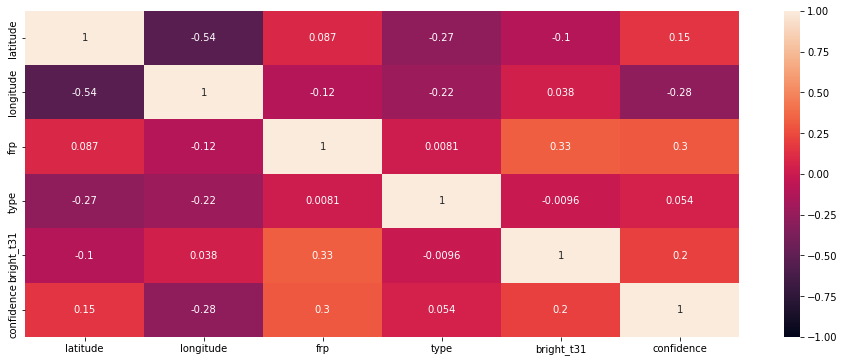

In [55]:
plt.figure(figsize=(16, 6))

sns.heatmap(daily_fires_df.corr(),  vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

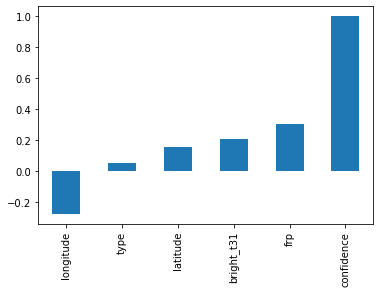

In [56]:
daily_fires_df.corr()['confidence'].sort_values().plot(kind='bar')